In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [26]:
# data = pd.read_csv("combined.csv")
# mask = data['County'] == "臺中市"
# taichung = data[mask]

In [47]:
df = pd.read_csv('taichung.csv')
df.columns
#df=df.drop(['Unit','Longitude','Latitude','SiteId'], axis=1)


Index(['Unnamed: 0', 'SiteName', 'County', 'AQI', 'Pollutant', 'Status', 'SO2',
       'CO', 'O3', 'O3_8hr', 'PM10', 'PM2.5', 'NO2', 'NOx', 'NO', 'WindSpeed',
       'WindDirec', 'DataCreationDate', 'Unit', 'CO_8hr', 'PM2.5_AVG',
       'PM10_AVG', 'SO2_AVG', 'Longitude', 'Latitude', 'SiteId'],
      dtype='object')

In [49]:
df = df[['SiteName', "DataCreationDate", "AQI"]]
print(df)
df=df[df["SiteName"]!="崇倫"]

df["Date"] = pd.to_datetime(df["DataCreationDate"], format = "%Y-%m-%d %H:%M")
# df = df.set_index(['Date'])

      SiteName  DataCreationDate    AQI
0           豐原  2016-12-27 00:00  123.0
1           沙鹿  2016-12-27 00:00  102.0
2           大里  2016-12-27 00:00  137.0
3           忠明  2016-12-27 00:00   99.0
4           西屯  2016-12-27 00:00  121.0
...        ...               ...    ...
47699       豐原  2016-12-02 23:00   69.0
47700       沙鹿  2016-12-02 23:00   54.0
47701       大里  2016-12-02 23:00   56.0
47702       忠明  2016-12-02 23:00   66.0
47703       西屯  2016-12-02 23:00   59.0

[47704 rows x 3 columns]


In [50]:
# Lists out Taichung's Sites
df['SiteName'].unique()

array(['豐原', '沙鹿', '大里', '忠明', '西屯'], dtype=object)

In [51]:
df.head()

,SiteName,DataCreationDate,AQI,Date
0,豐原,2016-12-27 00:00,123.0,2016-12-27
1,沙鹿,2016-12-27 00:00,102.0,2016-12-27
2,大里,2016-12-27 00:00,137.0,2016-12-27
3,忠明,2016-12-27 00:00,99.0,2016-12-27
4,西屯,2016-12-27 00:00,121.0,2016-12-27


In [52]:
df["AQI"].describe()
df["AQI"] = df["AQI"].fillna(0)

## Histogram

Skewness 0.819677
Kurtosis 0.343364


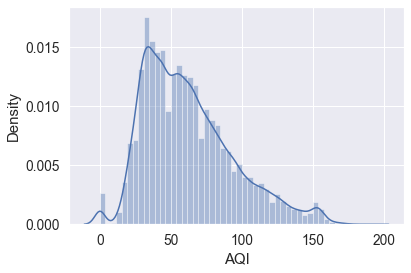

In [53]:
#sample = df['AQI'].sample(n=1000, random_state=1)
# plt.figure(figsize=((10,8)))
sns.distplot(df['AQI'])
print("Skewness %f" % df['AQI'].skew())
print("Kurtosis %f" % df['AQI'].kurt())




## Heatmap

<AxesSubplot:>

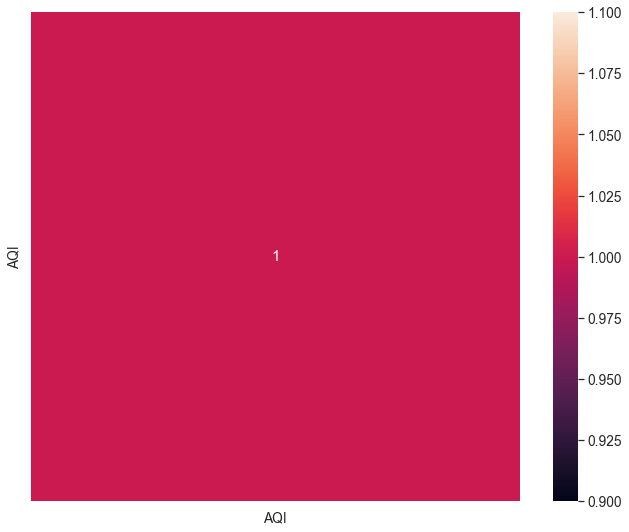

In [54]:
corrmap = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmap, square=True, annot=True)

In [56]:
# k = 10 #number of variables for heatmap
# cols = corrmap.nlargest(k, 'AQI')['AQI'].index
# cm = np.corrcoef(df[cols].values.T)
# print(df[cols].values.T)
# sns.set(font_scale=1.25)
# print(cm)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

# Testings

True

In [57]:
df_piv = df.pivot(index='Date', columns='SiteName', values='AQI')
display(df_piv)

SiteName,大里,忠明,沙鹿,西屯,豐原
Date,,,,,
2016-11-25 13:00:00,25.0,23.0,21.0,24.0,23.0
2016-11-25 14:00:00,25.0,28.0,26.0,30.0,25.0
2016-11-25 15:00:00,31.0,34.0,31.0,36.0,31.0
2016-11-25 16:00:00,39.0,39.0,35.0,40.0,37.0
2016-11-25 17:00:00,44.0,42.0,36.0,42.0,41.0
...,...,...,...,...,...
2018-01-08 19:00:00,42.0,32.0,36.0,38.0,29.0
2018-01-08 20:00:00,38.0,30.0,32.0,37.0,31.0
2018-01-08 21:00:00,35.0,28.0,27.0,32.0,31.0


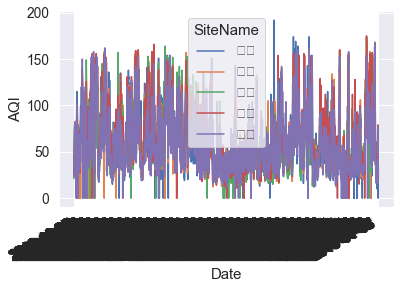

In [58]:
ax = df_piv.plot(xticks=df_piv.index, ylabel='AQI')

ValueError: Could not interpret value `SiteName` for parameter `hue`

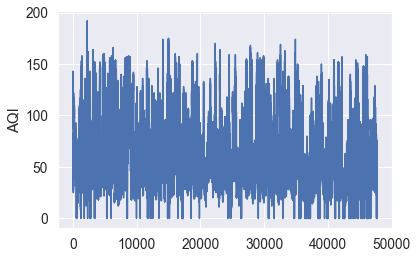

In [61]:
"""Dumped things"""
# # sns.lineplot(data=df['AQI'])

# # sns.lineplot(x=df['Date'], y=df['AQI'], hue='SiteName')

# #fig, ax = plt.subplots(figsize=(20,20))
# grouped = df.groupby('SiteName')
# ncols=2
# nrows = int(np.ceil(grouped.ngroups/ncols))

# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30,30), sharey=True)



# for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
#     grouped.get_group(key).plot(ax=ax, legend=False)


# #df.groupby("SiteName").plot(x="Date", y="AQI", marker="o", ax=ax, legend=False)

In [60]:
df1 = df.reset_index().melt(id_vars=['SiteName'])
#print (df1)
df1.columns

#sns.stripplot(data=df1,hue='SiteName',x='Date',y='AQI')

Index(['SiteName', 'variable', 'value'], dtype='object')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

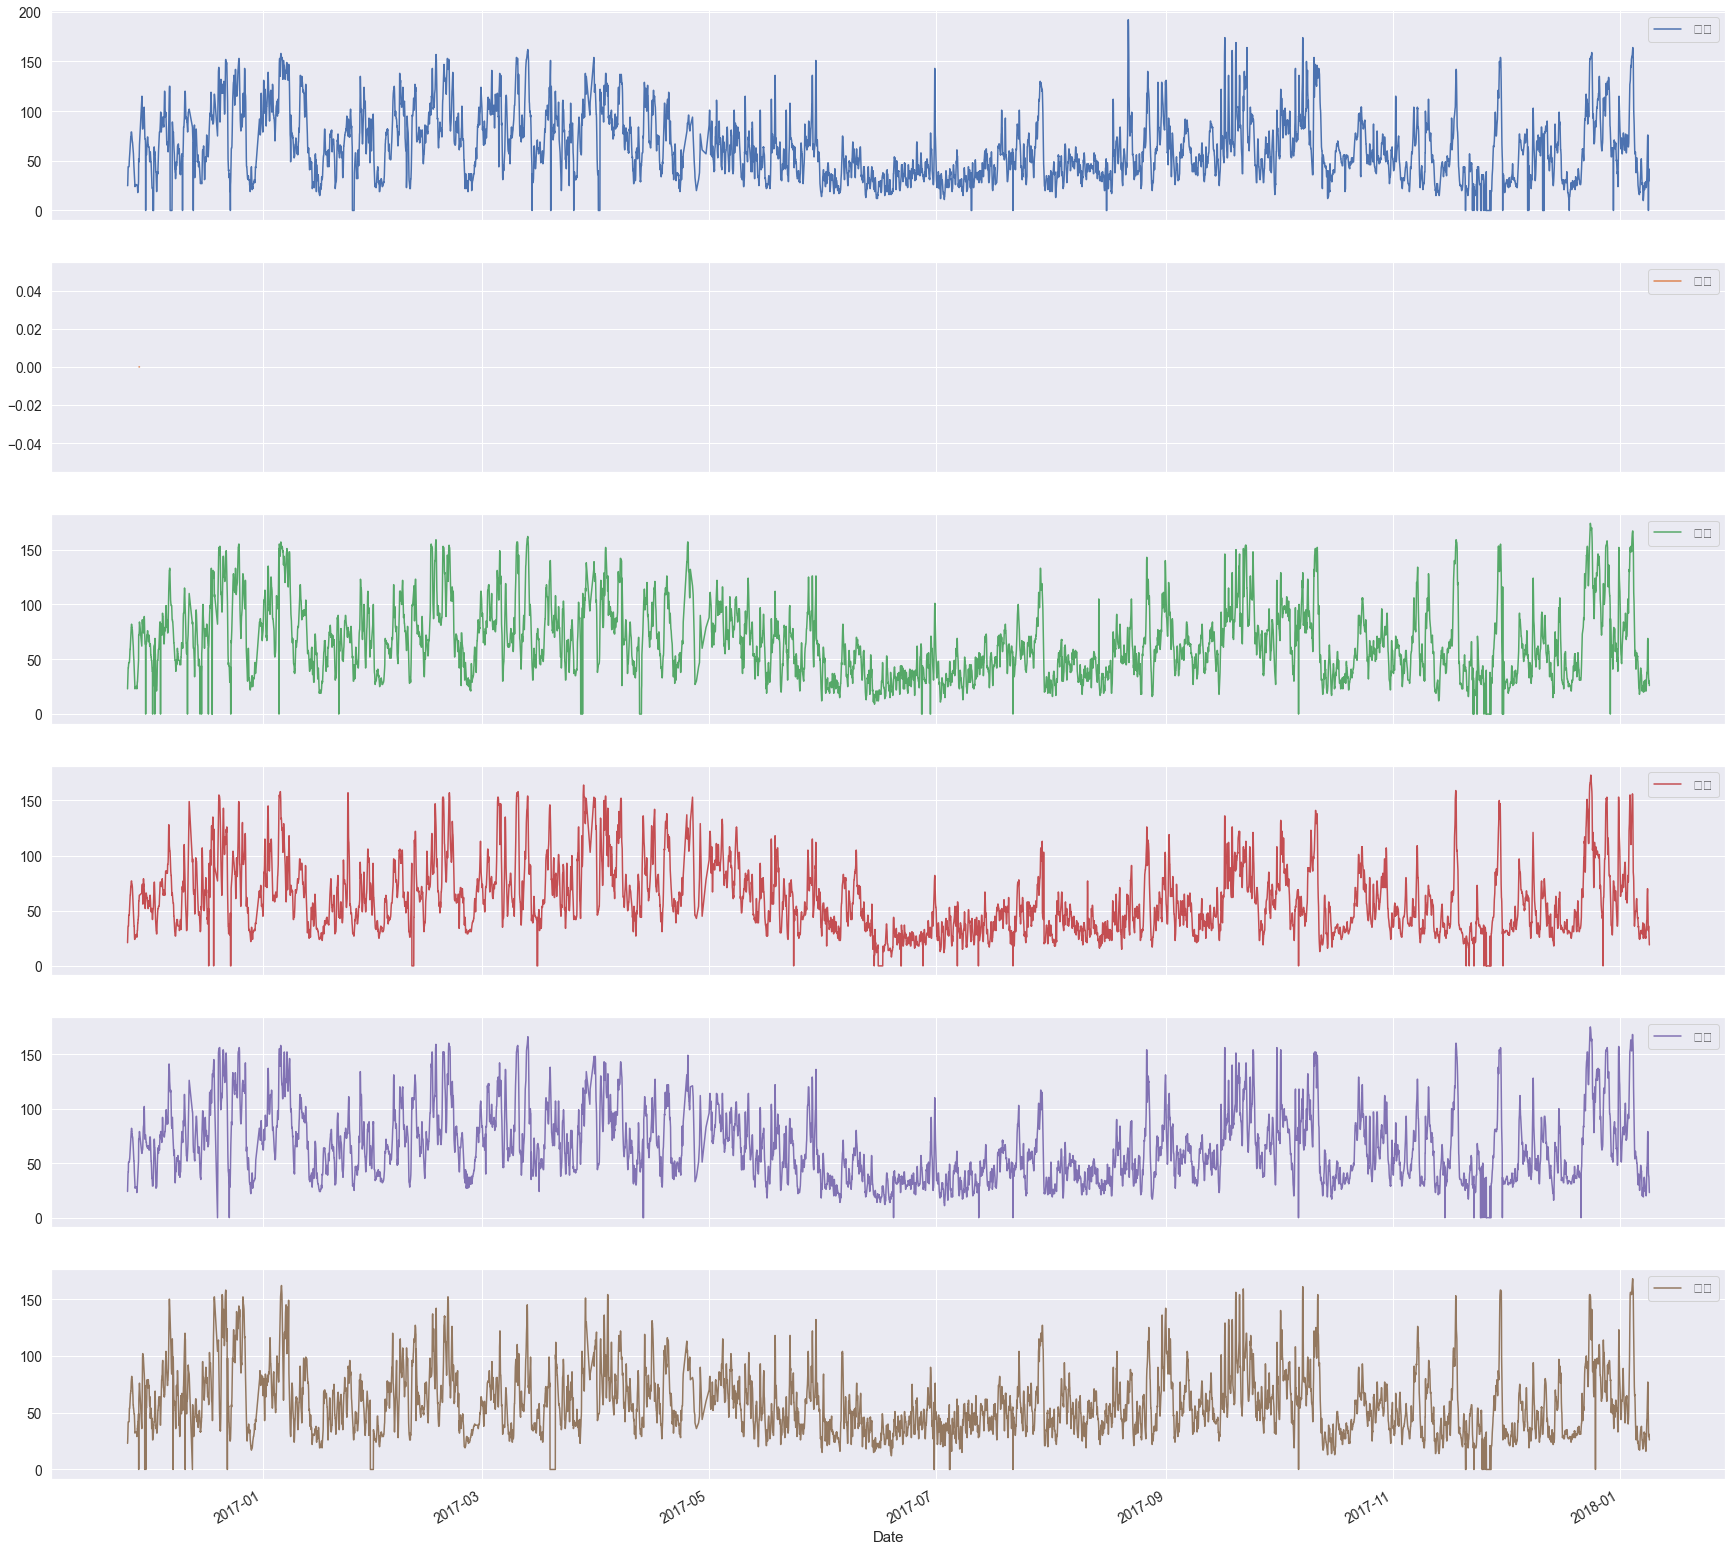

In [ ]:
pd.pivot_table(df.reset_index(),
               index='Date', columns='SiteName', values='AQI'
              ).plot(subplots=True, figsize=(30,30))

<AxesSubplot:ylabel='AQI'>

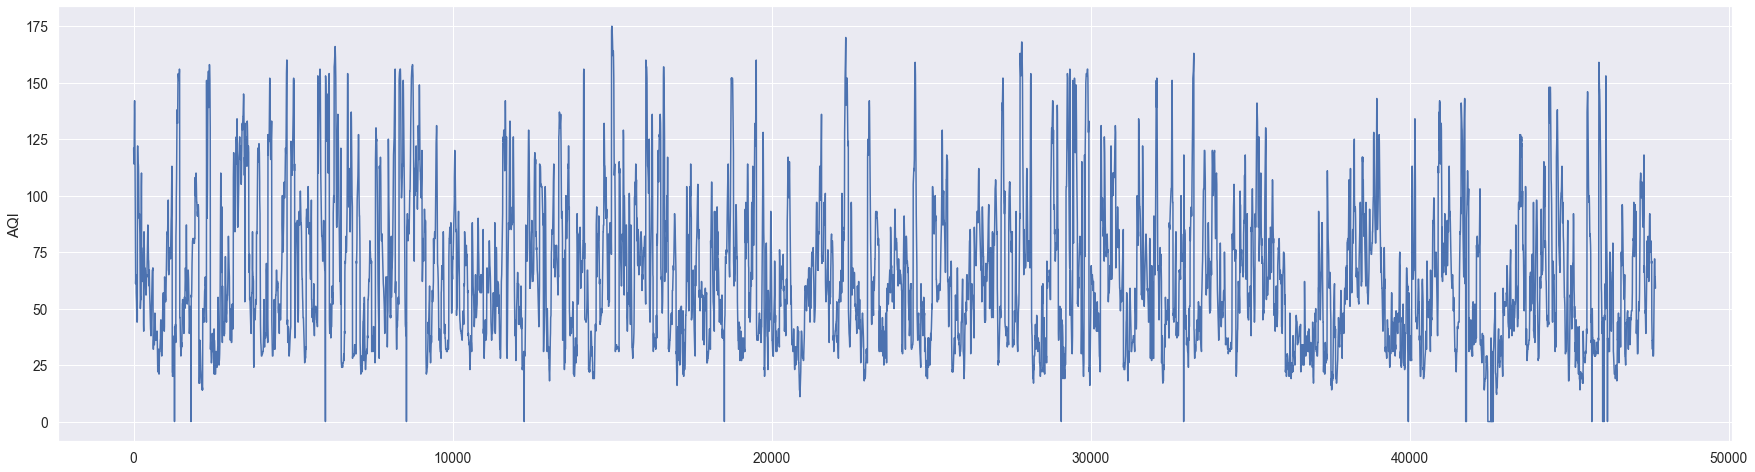

In [62]:
# sns.lineplot(x = 'Date', y = 'AQI',data = df)
# sns.lineplot(data=df['Date'], label = 'Avila Adobe', marker = 'o')

# g = sns.FacetGrid(df, col='Date', hue='SiteName')
#g = g.map(sns.lineplot, 'year', 'wage', ci=None).add_legend()

fig = plt.gcf()
fig.set_size_inches(30, 8)

mask = df['SiteName'] == '西屯'
new_df = df[mask]

# from scipy.signal import lfilter

# n = 100 # the larger n is, the smoother curve will be
# b = [1.0 / n] * n
# a = 1
# new_df['AQI'] = lfilter(b,a,new_df['AQI'])

from tsmoothie.smoother import *
smoother = ConvolutionSmoother(window_len=30, window_type='ones')
smoother.smooth(new_df['AQI'])


# lp = sns.lineplot(x = new_df.index, 'AQI', hue='SiteName', data=new_df)
# lp.legend(loc='upper right', bbox_to_anchor=(1, 1))

# m1 = new_df.index
# new_df = new_df[m1] 
sns.lineplot(data=new_df['AQI'])